<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [70]:
df = pd.read_csv('states_edu.csv')
df.head()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Chosen test: Math 8th grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [71]:
df = df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'AVG_MATH_8_SCORE']]
df.rename({'AVG_MATH_8_SCORE':'SCORE'},axis=1,inplace=True)
df = df.dropna()
df.head()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SCORE
0,2653798.0,1481703.0,252.0
2,3401580.0,1435908.0,265.0
3,1743022.0,964323.0,256.0
4,27138832.0,14358922.0,261.0
5,3264826.0,1642466.0,272.0


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [72]:
df['commitment'] = df['INSTRUCTION_EXPENDITURE']/df['TOTAL_EXPENDITURE']

Final feature list: percent of total expenditure spent on schools

Feature selection justification: spending on schools is often thought to be correlated to higher test scores and is discussed often as the fix all for poor school systems. I wanted to see if raw spending does correlate to better test scores as well as the financial priority that local governments place on schools (percent of total expenditures that go to schooling)

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

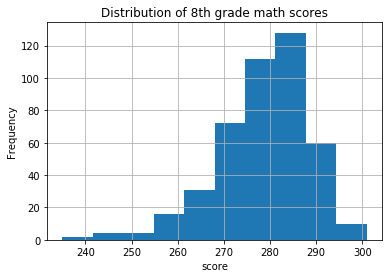

In [73]:
df.SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

Shows histogram of math scores that we are interested in, they are slightly skewed right with some very low scores

Visualization 2

Text(0.5, 1.0, 'Distribution of Proportion of School Spending from Total Spending')

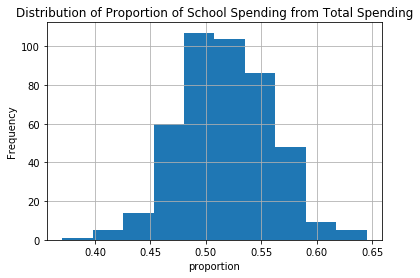

In [74]:
df.commitment.hist()
plt.xlabel('proportion')
plt.ylabel('Frequency')
plt.title('Distribution of Proportion of School Spending from Total Spending')

distribution of proportion of school spending from total spending, fairly uniform which should lend well to the regression model

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [75]:
from sklearn.model_selection import train_test_split
df.head()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SCORE,commitment
0,2653798.0,1481703.0,252.0,0.558333
2,3401580.0,1435908.0,265.0,0.422130
3,1743022.0,964323.0,256.0,0.553248
4,27138832.0,14358922.0,261.0,0.529091
5,3264826.0,1642466.0,272.0,0.503079


In [82]:
X = df[['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','commitment']]
y = df['SCORE']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.2, random_state=0)
y_train.shape

(351,)

<h2> Prediction </h2>

Chosen ML task: regression

In [84]:
# import your sklearn class here
from sklearn.linear_model import LogisticRegression

In [85]:
# create your model here
model = LogisticRegression()

In [86]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.022727272727272728

In [88]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

array([ 2.96037318e-06, -9.02745890e-06, -4.63381869e-11])

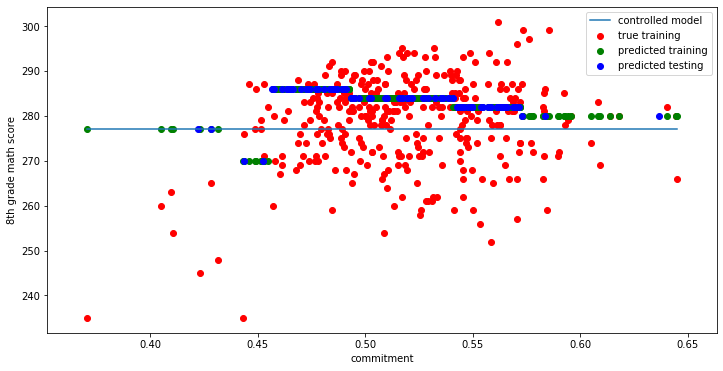

In [96]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'commitment'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]])[0] - (X_train[col_name].min()*model.coef_[col_index])[0]
plt.plot(new_x, intercept+new_x*(model.coef_[col_index])[0])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th grade math score')
X_train[col_name].min()*model.coef_[col_index]


<h2> Summary </h2>

After cleaning and investigating the data, there appears to be nearly zero correlation between overall spending, spending on schools, and the proportion of school spending from total spending to 8th grade math test scores. The r squared value was .02 and the visual above that shows proportion of school spending to math scores visually shows alost zero correlation. The schools with incredibly low commitment did noticably worse and the schools with incredibly high commitment did noticably better, but the middle ~95% of the commitment scores showed zero correlation. This potentially indicates that unless you spend a ton of your budget or the minimal amount on schooling, any small increase or decrease in am average school budget is likely to not correlate to any difference in test scores for this particular test. 